In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sln
%matplotlib inline

In [2]:
loan=pd.read_csv('loan.csv')

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
loannew=loan.drop('Loan_ID',axis=1)

In [20]:
loan['lconf']=np.where((loan['Loan_Status']=='Y'),1,0)

In [9]:
loannew.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,lconf
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0


In [11]:
loannew['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [12]:
loannew['lconf'].value_counts()

1    422
0    192
Name: lconf, dtype: int64

In [13]:
loannew[['Married','lconf']].groupby('Married').mean()

,lconf
Married,
No,0.629108
Yes,0.716080


In [18]:
loannewnumerical=loannew[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

In [24]:
loannew.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
lconf                 0
dtype: int64

In [11]:
loannew['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [3]:
loan['Gender'].fillna(value='Male',axis=0,inplace=True)

In [4]:
loan['Married'].dropna(axis=0,inplace=True)

In [17]:
loannew['Married'].isnull().sum()

3

In [39]:
loan.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
lconf                 0
dtype: int64

In [41]:
loan['Amounloan['LoanAmount'].mean()

146.41216216216216

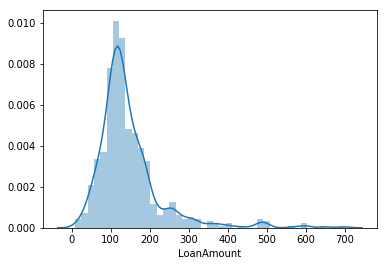

In [43]:
sln.distplot(loan['LoanAmount'].dropna())

In [5]:
loan['logLoanAmount']=np.log1p(loan['LoanAmount'].dropna())

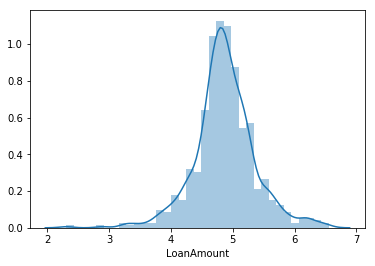

In [55]:
sln.distplot(log)

In [56]:
log.skew()

-0.15025717422036527

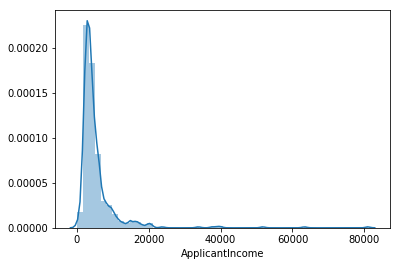

In [57]:
sln.distplot(loan['ApplicantIncome'])

In [66]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,lconf
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


In [69]:
loan[loan['CoapplicantIncome']==0]['lconf'].value_counts()

1    177
0     96
Name: lconf, dtype: int64

In [71]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,lconf,logLoanAmount
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,4.859812
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,4.204693
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,4.795791
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,4.955827


In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler=StandardScaler()

In [82]:
new=scaler.fit(loannewnumerical.dropna())

In [75]:
loannewnumerical=loan[['ApplicantIncome','CoapplicantIncome','logLoanAmount','Loan_Amount_Term']]

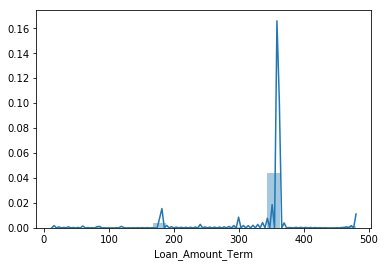

In [77]:
sln.distplot(loan['Loan_Amount_Term'].dropna())

In [86]:
type(new)

sklearn.preprocessing.data.StandardScaler

In [6]:
loan['logApplicant']=np.log1p(loan['ApplicantIncome'].dropna())

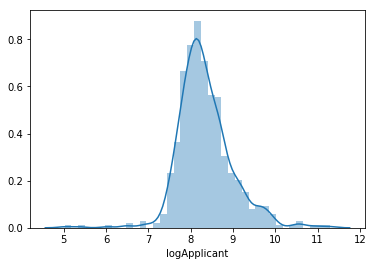

In [88]:
sln.distplot(loan['logApplicant'])

In [97]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,lconf,logLoanAmount,logApplicant
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,NaN,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,4.859812,8.430327
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,4.204693,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,4.795791,7.857094
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,4.955827,8.699681


In [7]:
loan['logLoanAmount'].fillna(value=loan['logLoanAmount'].mean(),inplace=True,axis=0)

In [8]:
loan['logLoanAmount'].isnull().sum()

0

In [134]:
X=loan[['Credit_History','logLoanAmount','logApplicant']]

In [135]:
y=loan['lconf']

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
lm=LogisticRegression(C=1.5,max_iter=300)

In [151]:
lm.fit(X_test,y_test)

LogisticRegression(C=1.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [152]:
X_test

,lconf,logApplicant
350,1,9.114270
377,1,8.368925
163,1,8.335192
609,1,7.972811
132,1,7.908019
578,1,7.486053
316,1,8.220941
2,1,8.006701
340,0,7.881560
77,0,6.908755


In [142]:
X=loan[loan['Credit_History'].notnull()][['lconf','logApplicant']]

In [143]:
y=loan['Credit_History'].dropna()

In [144]:
X_test=loan[loan['Credit_History'].isnull()][['lconf','logApplicant']]

In [145]:
lm.fit(X,y)

LogisticRegression(C=1.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [153]:
predict=lm.predict(X_test)

In [32]:
len(predict)

50

In [33]:
c=loan[loan['Credit_History'].isnull()]['Credit_History']

In [34]:
loan.loc[loan['Credit_History'].isnull(), 'Credit_History'] = predict
            
        
            


In [157]:
confusion_matrix(y_test,finalpredictons1)
mean_absolute_error(y_test,finalpredictons1)


0.17241379310344829

In [35]:
loan['Credit_History'].isnull().sum()

0

In [36]:
from sklearn.preprocessing import Imputer

In [37]:
my_imputer = Imputer(strategy='most_frequent')

In [154]:
finalpredictions=lm.predict(X_train)

In [155]:
from sklearn.metrics import confusion_matrix,consensus_score,mean_absolute_error

In [156]:
finalpredictons1=finalpredictions[:203]

In [62]:
len(y_test)

203

In [65]:
prediction=pd.DataFrame({'y_test':y_test,'predictions':finalpredictons1})

In [66]:
prediction

,predictions,y_test
350,1,1
377,1,1
163,1,1
609,0,1
132,1,1
578,1,1
316,1,1
2,0,1
340,1,0
77,1,0


In [30]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,lconf,logApplicant,logLoanAmount
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,8.674197,4.866325
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,8.430327,4.859812
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,8.006701,4.204693
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,7.857094,4.795791
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,8.699681,4.955827


In [31]:
loan.LoanAmount.isnull().sum()

22

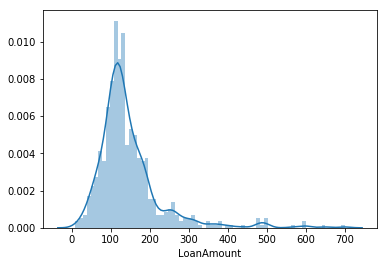

In [36]:
sln.distplot(loan.LoanAmount.dropna(),bins=70)

In [37]:
loanfinal=loan[loan['LoanAmount']<420]

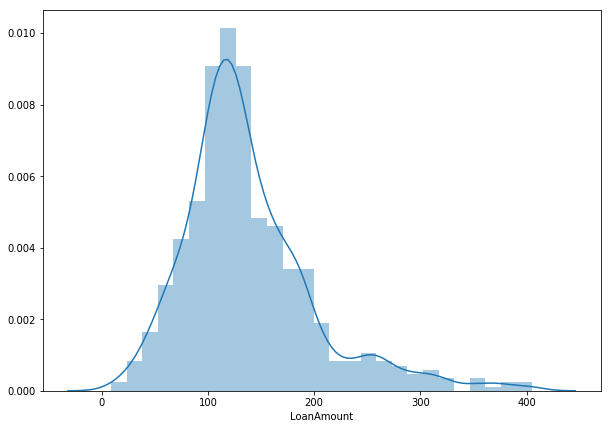

In [40]:
plt.figure(figsize=(10,7))
sln.distplot(loanfinal.LoanAmount.dropna())

In [44]:
test=loanfinal.LoanAmount.fillna(value=350)

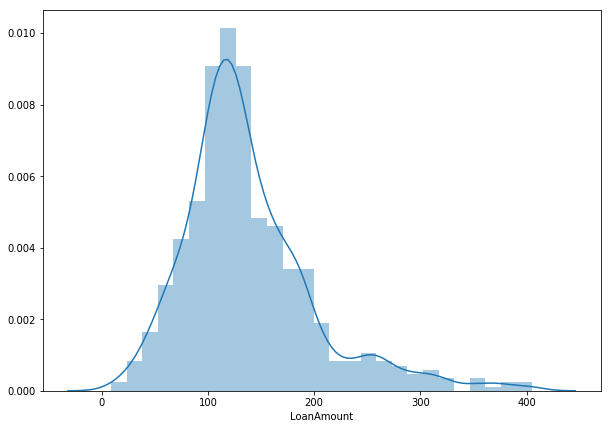

In [45]:
plt.figure(figsize=(10,7))
sln.distplot(test)

In [49]:
loanfinal['returnpower']=loanfinal['ApplicantIncome']/loanfinal['LoanAmount']

C:\Users\user\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
loanfinal.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,lconf,logApplicant,logLoanAmount,returnpower
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,8.430327,4.859812,35.804688
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,8.006701,4.204693,45.454545
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,7.857094,4.795791,21.525000
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,8.699681,4.955827,42.553191
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,8.597482,5.590987,20.288390


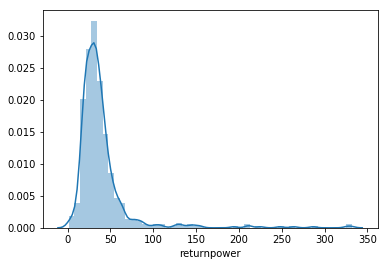

In [51]:
sln.distplot(loanfinal['returnpower'])

In [52]:
loanfinal1=loanfinal[loanfinal['returnpower']<125]

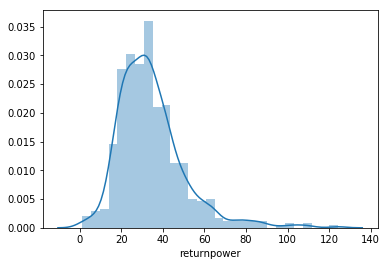

In [53]:
sln.distplot(loanfinal1['returnpower'])

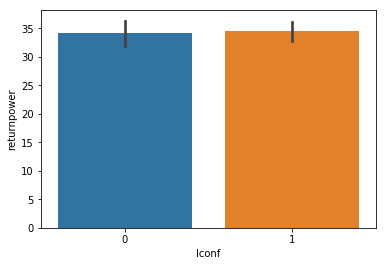

In [58]:
sln.barplot('lconf','returnpower',data=loanfinal1)

In [75]:
from sklearn import cross_validation

C:\Users\user\Anaconda4\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [78]:
cv = cross_validation.KFold(len(X_train), n_folds=10)

In [158]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

In [159]:
kfold = model_selection.KFold(n_splits=10, random_state=7)

In [160]:
modelCV = LogisticRegression()

In [161]:
scoring = 'accuracy'

In [162]:
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)

In [163]:
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.869


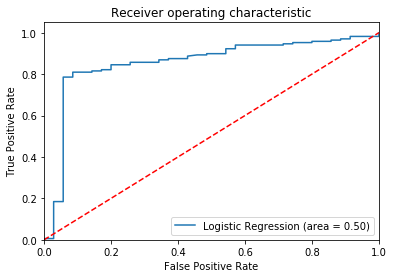

In [164]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lm.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")